In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from PIL import Image

In [44]:
data_folder = Path("data/corgi")
images_folder = data_folder / "images"
description = pd.read_csv(data_folder / "description.csv")
figs_folder = Path("figs")

image_filenames = list(images_folder.glob("*.jpg"))

In [46]:
def plot_random_hundred(image_filenames):
    plt.figure(figsize=(30, 30))
    selected = np.random.choice(image_filenames, size=100, replace=False)
    for idx, image_fn in enumerate(selected):
        image = Image.open(image_fn)

        plt.subplot(10, 10, idx+1)
        plt.imshow(image)
        plt.axis("off")

# plot_random_hundred(image_filenames)
# plt.savefig(figs_folder / "corgi-dataset-example", bbox_inches="tight")

In [51]:
description["contains"] = description.accessibility_caption.apply(lambda x: x.split("Image may contain:")[1] if x is not np.nan and "Image may contain:" in x else None)

In [71]:
contains_dog = description.contains.apply(lambda x: x is not None and "dog" in x)
contains_dog.sum()

54544

In [72]:
contains_only_dog = description.contains.apply(lambda x: x is not None and "dog" == x.strip())
contains_only_dog.sum()

23196

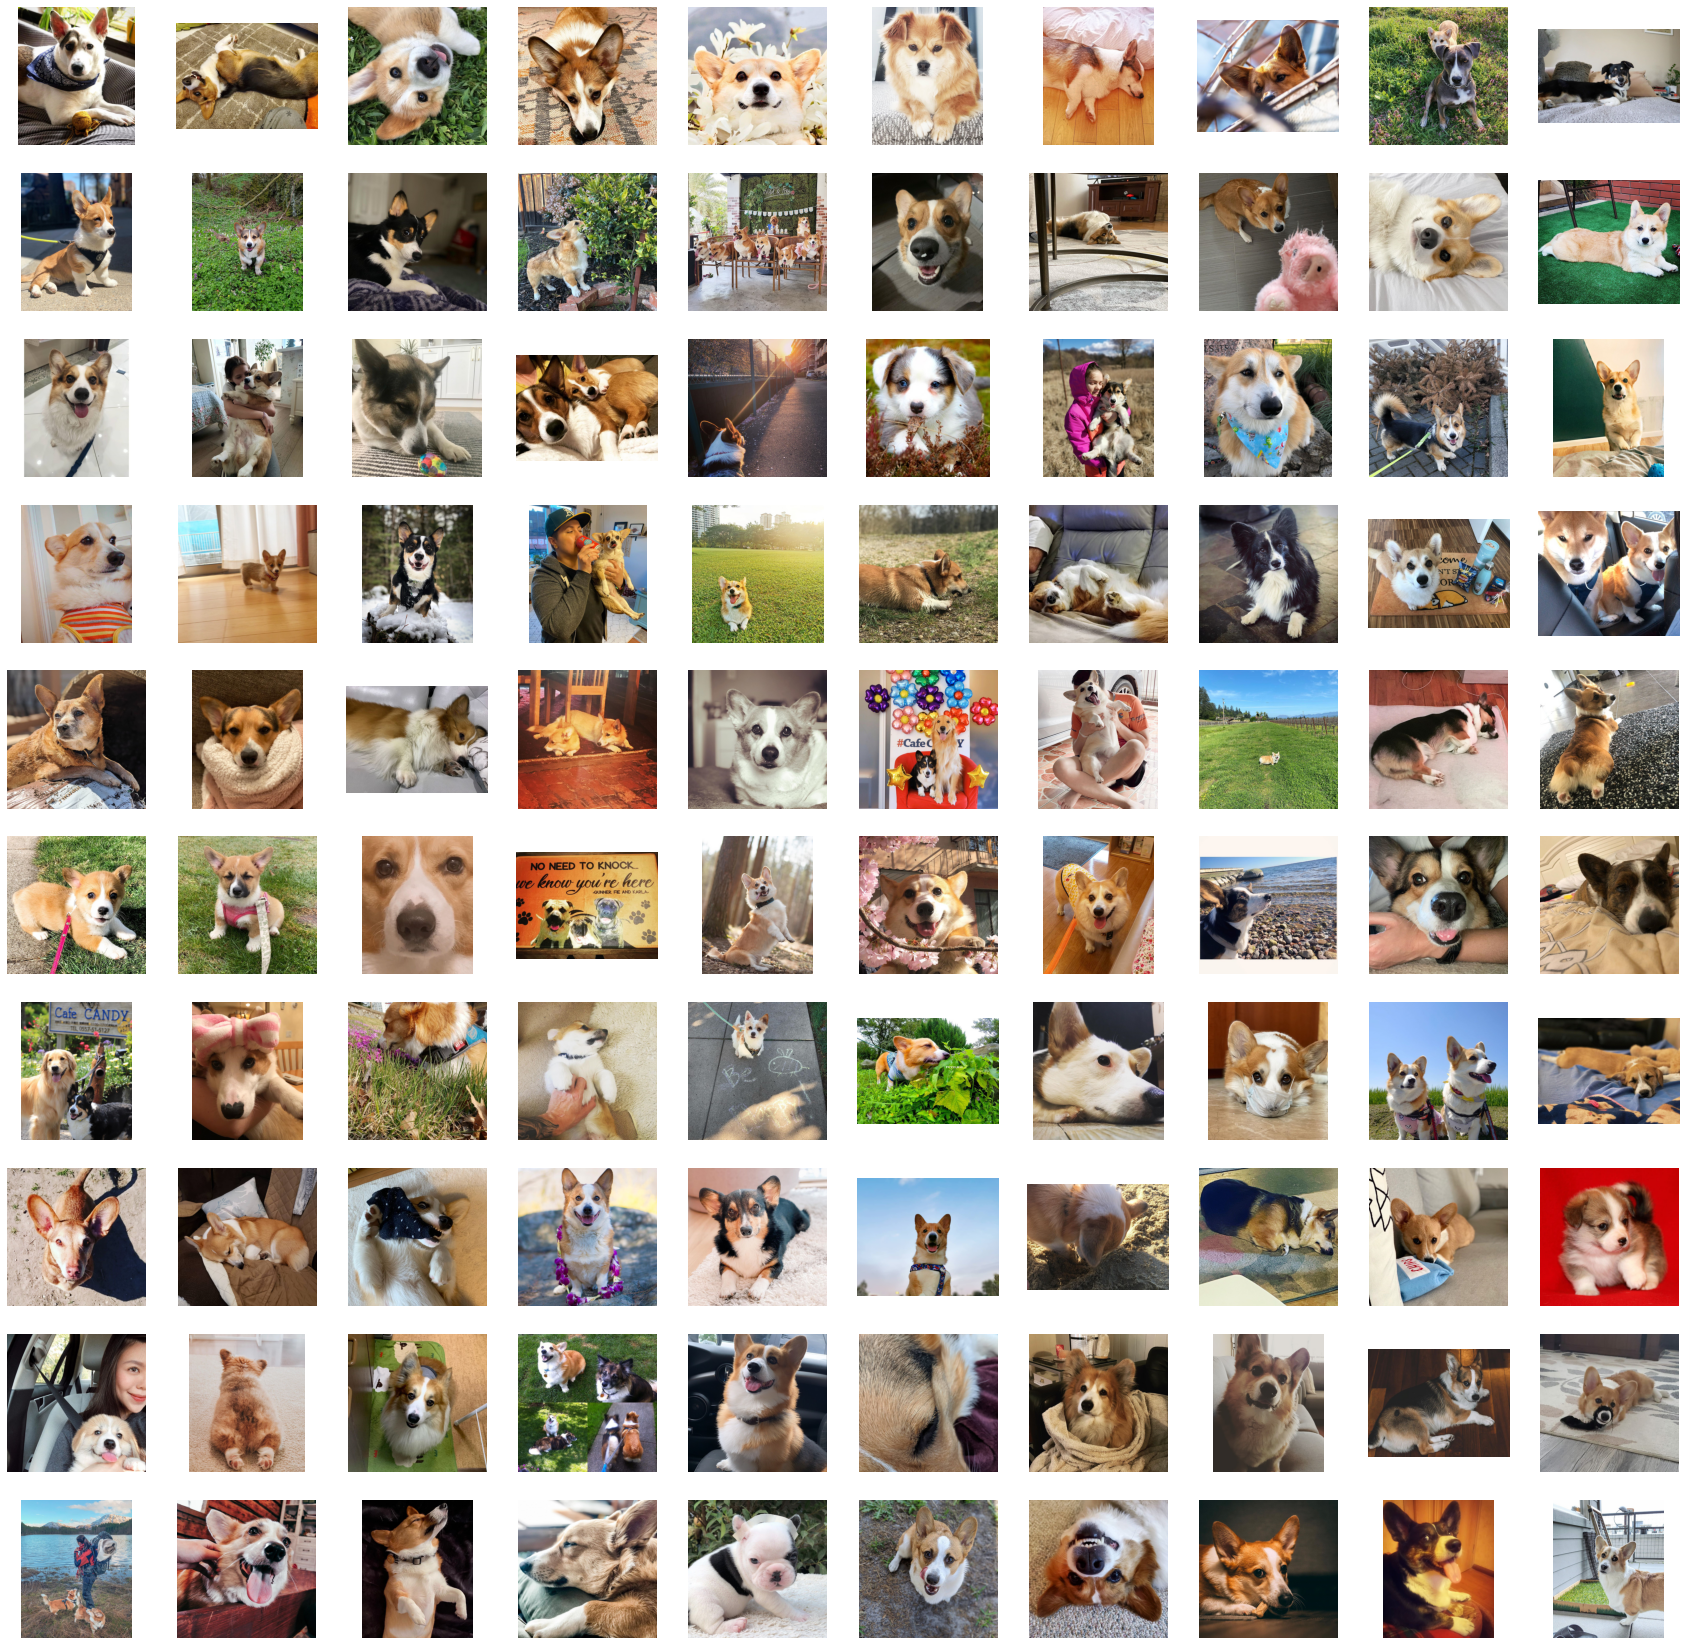

In [70]:
plot_random_hundred(description[contains_dog].shortcode.apply(lambda x: images_folder / (x + ".jpg")))

In [78]:
description.head()

accessibility_caption  \
0  Photo by Maodu on April 11, 2020. Image may co...   
1                                                NaN   
2                                                NaN   
3  Photo shared by Corgicasting on April 11, 2020...   
4                                                NaN   

                                             caption  \
0  Are they real friends? #ragdollcat #catanddog ...   
1                          whatchu doin 👀 can i join   
2  Our pawrents had hamburgers for lunch and mahm...   
3  Low to the ground hound: @pinotandstella (Pino...   
4  #meme #ecuador🇪🇨 #quito #you #cool #momo #momo...   

                                         display_url  liked_by     owner_id  \
0  https://instagram.fdnk1-1.fna.fbcdn.net/v/t51....       0.0  16571228998   
1  https://instagram.fdnk1-2.fna.fbcdn.net/v/t51....       2.0   1621745810   
2  https://instagram.fdnk1-1.fna.fbcdn.net/v/t51....       0.0   8603291871   
3  https://instagram.fdnk1-1.fna.fbcdn.net/v/t51....       0.0   4337696094   
4  https://instagram.fdnk1-2.fna.fbcdn.net/v/t51....       0.0   1549528391   

   parsed_at_timestamp    shortcode  taken_at_timestamp    typename   contains  
0         1.586636e+09  B-2o2CggSVO        1.586636e+09  GraphImage        cat  
1         1.586636e+09  B-2ovB-pRXL        1.586636e+09  GraphVideo       None  
2         1.586636e+09  B-2oaA9Jx9W        1.586636e+09  GraphVideo       None  
3         1.586636e+09  B-2ozSJJkHm        1.586636e+09  GraphImage   1 person  
4         1.586636e+09  B-2osywgzwW        1.586636e+09  GraphVideo       None

In [83]:
description[["liked_by", "taken_at_timestamp"]]

liked_by  taken_at_timestamp
0           0.0        1.586636e+09
1           2.0        1.586636e+09
2           0.0        1.586636e+09
3           0.0        1.586636e+09
4           0.0        1.586636e+09
...         ...                 ...
99995      40.0        1.585138e+09
99996      99.0        1.585138e+09
99997     257.0        1.585138e+09
99998      23.0        1.585138e+09
99999      61.0        1.585138e+09

[100000 rows x 2 columns]

### Why???

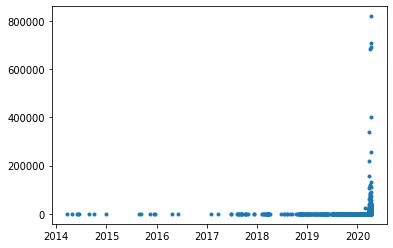

In [93]:
plt.plot(pd.to_datetime(description.taken_at_timestamp, unit="s"), description.liked_by, ".")